In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data 

In [2]:
media =pd.read_csv("mediacompany.csv")

In [3]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
# check duplicates


In [5]:
media.isnull().sum()

Date                    0
Views_show              0
Visitors                0
Views_platform          0
Ad_impression           0
Cricket_match_india     0
Character_A             0
Unnamed: 7             80
dtype: int64

In [6]:
media.drop('Unnamed: 7',axis =1,inplace=True)

In [7]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


# Data inspection

In [8]:
media.shape

(80, 7)

In [9]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [10]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


# Data cleaning

In [11]:
# check null values
media.isnull().sum()*100/ media.shape[0]

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

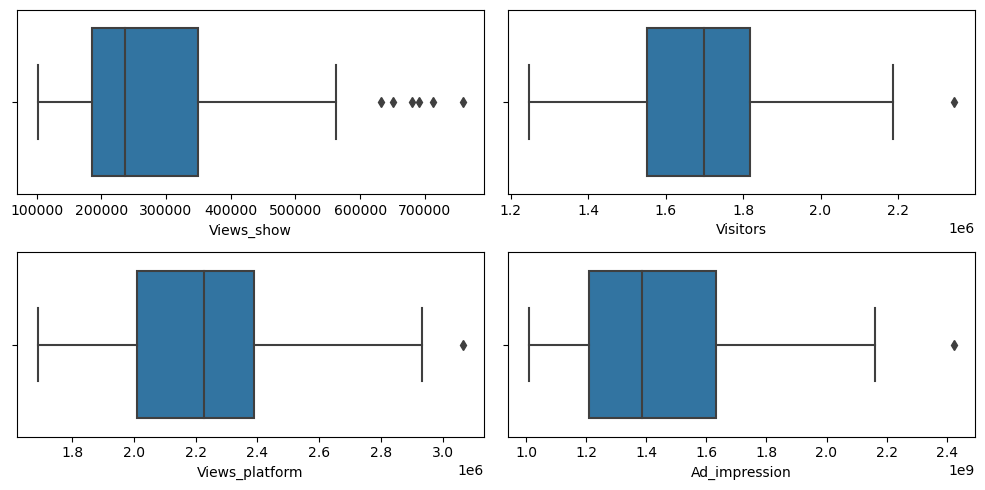

In [12]:
#check the outliers using boxplot
fig,axs=plt.subplots(2,2,figsize=(10,5))
plot1=sns.boxplot(media['Views_show'],ax=axs[0,0])
plot2=sns.boxplot(media['Visitors'],ax=axs[0,1])
plot3=sns.boxplot(media['Views_platform'],ax=axs[1,0])
plot4=sns.boxplot(media['Ad_impression'],ax=axs[1,1])
plt.tight_layout()
plt.show()


# Convert data in pandas date format


In [13]:
media['Date']=pd.to_datetime(media['Date'],dayfirst=False)

In [14]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [15]:
#create a new column day of week
media["Day_of_week"]=media["Date"].dt.dayofweek

In [16]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


# Exploratory Data analysis

<AxesSubplot:xlabel='Views_show'>

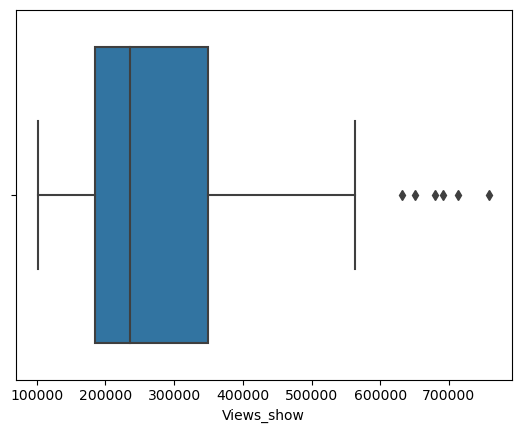

In [17]:
sns.boxplot(media['Views_show'])

# Univariate analysis

<AxesSubplot:xlabel='Date'>

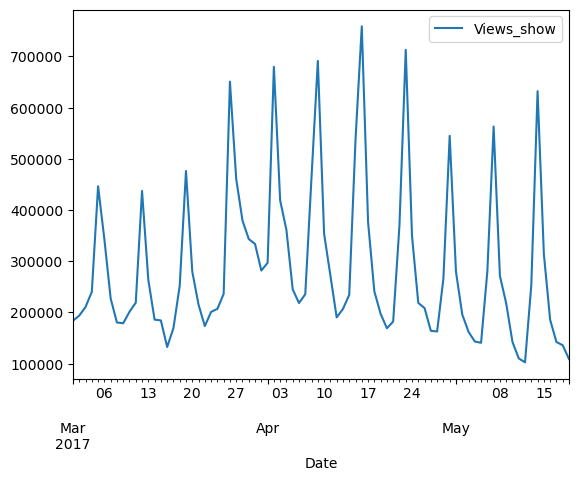

In [18]:
media.plot.line(x='Date',y='Views_show')

we can see pattern in the plot

<AxesSubplot:xlabel='Day_of_week', ylabel='Views_show'>

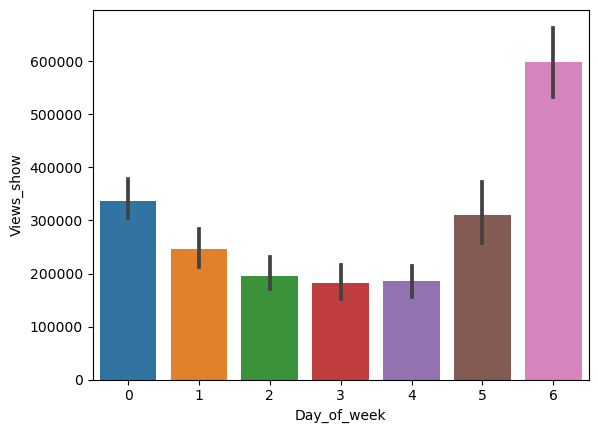

In [19]:
sns.barplot(data=media,x='Day_of_week',y='Views_show')

we can observe that the views are more on sunday and saturday.Also there the views decline on rest of the days.

convert weekend into 0 and 1 and create a new column

In [20]:
# media['weekend']=media['Day_of_week'].map({5:1,6:1,4:0,3:0,2:0,1:1})

In [21]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


In [22]:
day={5:1,6:1,4:0,3:0,2:0,1:0,0:0}

In [23]:
media['weekend']=media['Day_of_week'].map(day)

In [24]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


<AxesSubplot:xlabel='weekend', ylabel='Views_show'>

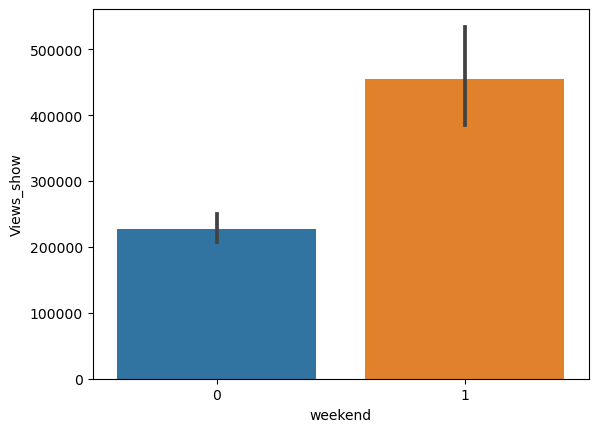

In [25]:
sns.barplot(data=media,x='weekend',y='Views_show')

viewership is high on weekends

<AxesSubplot:xlabel='Visitors', ylabel='Views_show'>

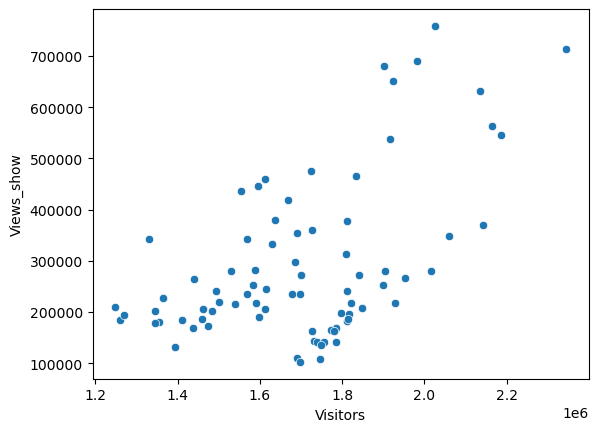

In [26]:
sns.scatterplot(data=media,x='Visitors',y='Views_show')

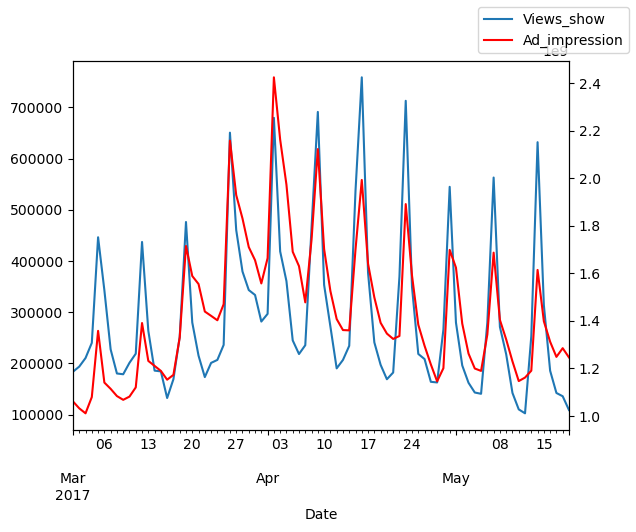

In [27]:
# plot for Date vs Views_show and days vs Ad_impressions
ax = media.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
media.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

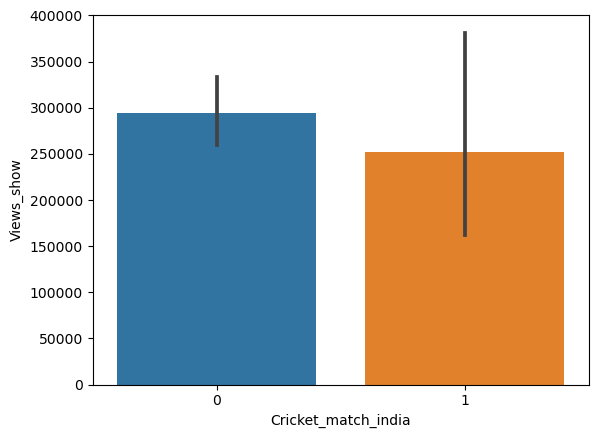

In [28]:
sns.barplot(data = media,x='Cricket_match_india', y='Views_show')

there is a slight decrease in view_show when there is a cricket match

<AxesSubplot:xlabel='Character_A', ylabel='Views_show'>

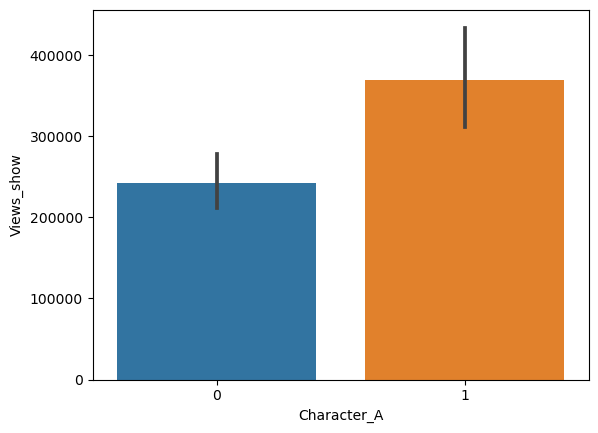

In [29]:
sns.barplot(data = media,x='Character_A', y='Views_show')

presence of character A improves the views

# Model building

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler= MinMaxScaler()

applying the scaler to all the columns except the columns with yes and no or dummy variables

In [32]:
numerical_variables= ["Views_show","Visitors","Views_platform","Ad_impression"]

In [33]:
media[numerical_variables]= scaler.fit_transform(media[numerical_variables])

In [34]:
media[numerical_variables]

,Views_show,Visitors,Views_platform,Ad_impression
0,0.123787,0.010985,0.011466,0.035372
1,0.139066,0.020409,0.000000,0.014844
2,0.164544,0.000000,0.025792,0.000000
3,0.209631,0.223199,0.119842,0.048345
4,0.523988,0.316041,0.255290,0.245426
...,...,...,...,...
75,0.322240,0.511188,0.390233,0.273951
76,0.126761,0.516244,0.370619,0.213038
77,0.060569,0.462960,0.389479,0.167971
78,0.050831,0.457352,0.445559,0.193862


In [35]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1


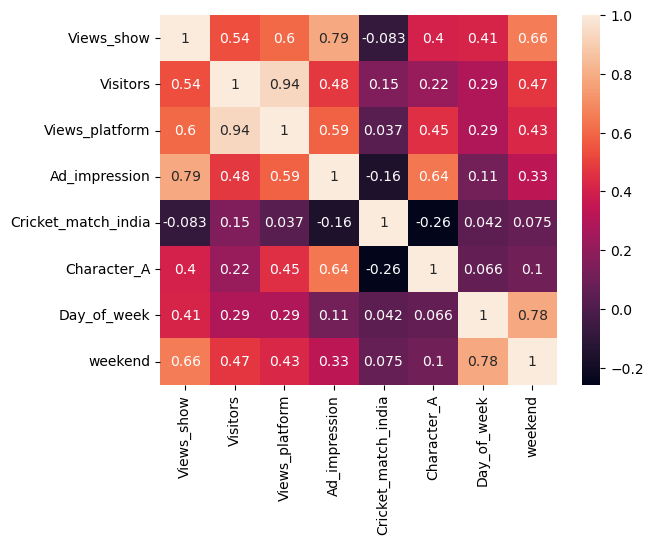

In [36]:
sns.heatmap(media.corr(),annot =True)
plt.show()

# Implementing first model to visitor and weekend

In [37]:
X=media[["Visitors","weekend"]]
y=media[["Views_show"]]

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(X,y)

LinearRegression()

In [41]:
import statsmodels.api as sm

In [42]:
X=sm.add_constant(X)
lm_1= sm.OLS(y,X).fit()

In [43]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           2.51e-12
Time:                        15:56:37   Log-Likelihood:                 30.210
No. Observations:                  80   AIC:                            -54.42
Df Residuals:                      77   BIC:                            -47.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0770      0.042      1.826      0.072      -0.007       0.161
Visitors       0.3231      0.102      3.160      0.002       0.119       0.527
weekend        0.2754      0.048      5.740      0.000       0.180       0.371
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                         6.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Runnung second model and adding variable Character_A

In [44]:
X=media[["Visitors","weekend","Character_A"]]

In [45]:
y= media['Views_show']

In [46]:
import statsmodels.api as sm

In [47]:
X= sm.add_constant(X)
lm2=sm.OLS(y,X).fit()

In [48]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.53e-14
Time:                        15:56:37   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      0.176      -0.024       0.131
Visitors        0.2474      0.096      2.586      0.012       0.057       0.438
weekend         0.2762      0.044      6.281      0.000       0.189       0.364
Character_A     0.1454      0.037      3.963      0.000       0.072       0.219
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                         7.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
media['Lag_views']= np.roll(media['Views_show'],1)

In [50]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend,Lag_views
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.009817
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631


In [51]:
media['Lag_views'][0]=0

In [52]:
import statsmodels.api as sm

In [53]:
X=media[["Visitors","weekend","Character_A",'Lag_views']]
y=media['Views_show']

In [54]:
X= sm.add_constant(X)
lm_3=sm.OLS(y,X).fit()

In [55]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     54.94
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.48e-21
Time:                        15:56:38   Log-Likelihood:                 57.207
No. Observations:                  80   AIC:                            -104.4
Df Residuals:                      75   BIC:                            -92.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0149      0.032     -0.460      0.647      -0.079       0.050
Visitors        0.1146      0.078      1.471      0.145      -0.041       0.270
weekend         0.3476      0.036      9.597      0.000       0.275       0.420
Character_A     0.0832      0.030      2.743      0.008       0.023       0.144
Lag_views       0.4433      0.065      6.861      0.000       0.315       0.572
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   2.681
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                0.998
Skew:                          -0.175   Prob(JB):                        0.607
Kurtosis:                       3.421   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Implementing 4rd model

In [56]:
X=media[["weekend","Character_A","Views_platform"]]
y=media['Views_show']

In [57]:
X=sm.add_constant(X)
lm_4= sm.OLS(y,X).fit()

In [58]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.59e-15
Time:                        15:56:38   Log-Likelihood:                 39.264
No. Observations:                  80   AIC:                            -70.53
Df Residuals:                      76   BIC:                            -61.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0485      0.036      1.358      0.178      -0.023       0.120
weekend            0.2714      0.042      6.410      0.000       0.187       0.356
Character_A        0.1076      0.040      2.717      0.008       0.029       0.187
Views_platform     0.3155      0.100      3.152      0.002       0.116       0.515
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                         7.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Implementing 5th model

In [59]:
X=media[["weekend","Character_A","Visitors"]]
y=media['Views_show']

In [60]:
X=sm.add_constant(X)
lm_5= sm.OLS(y,X).fit()

In [61]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.53e-14
Time:                        15:56:38   Log-Likelihood:                 37.723
No. Observations:                  80   AIC:                            -67.45
Df Residuals:                      76   BIC:                            -57.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0534      0.039      1.366      0.176      -0.024       0.131
weekend         0.2762      0.044      6.281      0.000       0.189       0.364
Character_A     0.1454      0.037      3.963      0.000       0.072       0.219
Visitors        0.2474      0.096      2.586      0.012       0.057       0.438
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                         7.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# implementing 6th model

In [62]:
X=media[["weekend","Character_A","Visitors","Ad_impression"]]
y=media['Views_show']

In [63]:
X=sm.add_constant(X)
lm_6= sm.OLS(y,X).fit()

In [64]:
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.10e-25
Time:                        15:56:38   Log-Likelihood:                 67.431
No. Observations:                  80   AIC:                            -124.9
Df Residuals:                      75   BIC:                            -113.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0064      0.028     -0.229      0.819      -0.062       0.049
weekend           0.2263      0.031      7.296      0.000       0.165       0.288
Character_A      -0.0447      0.033     -1.356      0.179      -0.110       0.021
Visitors          0.0240      0.071      0.340      0.735      -0.117       0.165
Ad_impression     0.7751      0.085      9.090      0.000       0.605       0.945
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7th model

In [65]:
X=media[["weekend","Character_A","Ad_impression"]]
y=media['Views_show']

In [66]:
X=sm.add_constant(X)
lm_7= sm.OLS(y,X).fit()


In [67]:
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.05e-26
Time:                        15:56:38   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.021     -0.015      0.988      -0.043       0.042
weekend           0.2302      0.029      8.019      0.000       0.173       0.287
Character_A      -0.0456      0.033     -1.394      0.167      -0.111       0.020
Ad_impression     0.7851      0.080      9.875      0.000       0.627       0.943
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# convert add impressions


In [68]:
media['Ad_impression_million']=media['Ad_impression']/1000000

In [69]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend,Lag_views,Ad_impression_million
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,0.000000,3.537226e-08
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,0.123787,1.484366e-08
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,0.139066,0.000000e+00
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,0.164544,4.834451e-08
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,0.209631,2.454261e-07


# 8th model

In [70]:
X=media[["weekend","Character_A","Ad_impression_million",'Cricket_match_india']]
y=media['Views_show']

In [71]:
X=sm.add_constant(X)
lm_8= sm.OLS(y,X).fit()

In [72]:
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.02e-25
Time:                        15:56:38   Log-Likelihood:                 67.508
No. Observations:                  80   AIC:                            -125.0
Df Residuals:                      75   BIC:                            -113.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0030      0.022      0.133      0.894      -0.042       0.048
weekend                   0.2318      0.029      7.987      0.000       0.174       0.290
Character_A              -0.0487      0.033     -1.457      0.149      -0.115       0.018
Ad_impression_million  7.837e+05   7.99e+04      9.802      0.000    6.24e+05    9.43e+05
Cricket_match_india      -0.0213      0.042     -0.510      0.612      -0.104       0.062
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     7.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 9th model

In [73]:
X=media[["weekend","Character_A","Ad_impression_million"]]
y=media['Views_show']

In [74]:
X=sm.add_constant(X)
lm_9= sm.OLS(y,X).fit()

In [75]:
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.05e-26
Time:                        15:56:38   Log-Likelihood:                 67.369
No. Observations:                  80   AIC:                            -126.7
Df Residuals:                      76   BIC:                            -117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0003      0.021     -0.015      0.988      -0.043       0.042
weekend                   0.2302      0.029      8.019      0.000       0.173       0.287
Character_A              -0.0456      0.033     -1.394      0.167      -0.111       0.020
Ad_impression_million  7.851e+05   7.95e+04      9.875      0.000    6.27e+05    9.43e+05
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Making predictions

In [76]:
X=media[["weekend","Character_A","Ad_impression_million"]]
X=sm.add_constant(X)
Predicted_views = lm_9.predict(X)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)


In [78]:
mse

0.010866088433646177

In [79]:
r_squared 

0.802643446857565

Text(0, 0.5, 'Views')

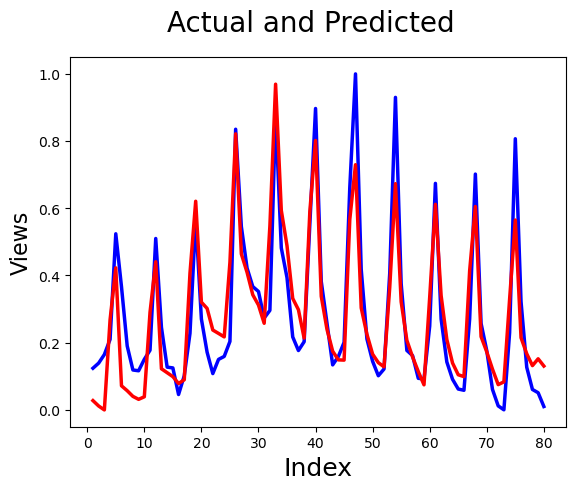

In [80]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 

Text(0, 0.5, 'Views_show-Predicted_views')

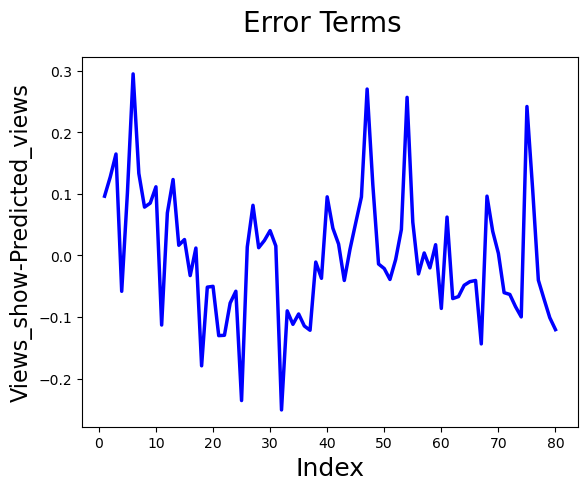

In [81]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)  

# making prediction

In [82]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_5.predict(X)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [84]:
mse

0.02280104764033187

In [85]:
r_squared

0.5858734080979341

Text(0, 0.5, 'Views')

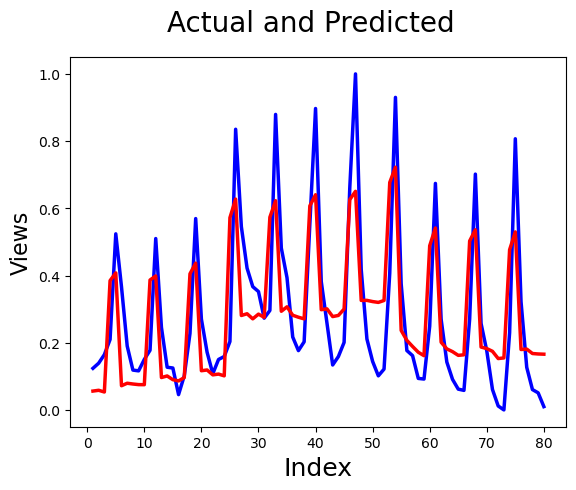

In [86]:

#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

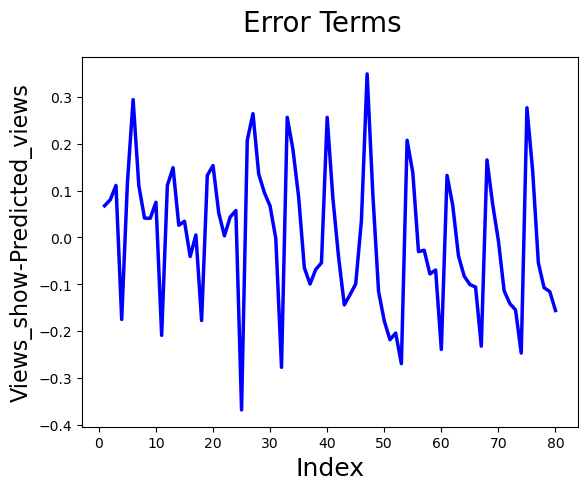

In [87]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

Ad Impressions and Character A as the driver variables that could explain the viewership pattern. Based on industry experience, ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly, Character A’s absence and presence created a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership